In [2]:
# Jalankan di terminal jika belum install
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import Polygon, Point

In [3]:
#definisikan path
flood_path = r"D:\WORK\COURSE\MAPID\SESSION 2_PYTHON FOR SPATIAL DATA\MAPID_WEBGIS_BOOTCAMP\labs\data_point_pluvial_flood_dataset.geojson"

In [4]:
# Load file data_point_pluvial_flood_dataset.geojson ke dalam GeoDataFrame.
# Tampilkan 5 baris pertama data

flood_gpd = gpd.read_file(flood_path)
print(flood_gpd)
flood_gpd.head()

               X         Y      Slope    Curvature       Aspect       TWI  \
0       3.909444  7.443056  46.686142 -3.888000e+09   45.000000 -3.250368   
1       3.908611  7.442778  52.151768  1.296000e+09   60.945396 -4.313832   
2       3.908889  7.442778  66.484085  0.000000e+00   67.619865 -8.327622   
3       3.909167  7.442778  58.007183 -2.592000e+09   38.659809 -4.707937   
4       3.909444  7.442778  60.503792 -1.296000e+09  351.869904 -5.985817   
...          ...       ...        ...           ...         ...       ...   
144396  3.864167  7.311667  70.837776  1.296000e+09  272.489563 -8.552538   
144397  3.864444  7.311667  72.578880  1.296000e+09  295.559967 -9.347733   
144398  3.864722  7.311667  70.667946  6.480000e+09  322.125031 -9.236161   
144399  3.859722  7.311389  61.980232  1.296000e+09  183.814072 -8.819514   
144400  3.860000  7.311389  68.768135  5.184000e+09  150.945389 -9.134113   

           FA  Drainage    Rainfall     SUSCEP                 geometry  
0

,X,Y,Slope,Curvature,Aspect,TWI,FA,Drainage,Rainfall,SUSCEP,geometry
0,3.909444,7.443056,46.686142,-3.888000e+09,45.000000,-3.250368,147.0,228.8528,101.515616,Very_High,POINT (3.90944 7.44306)
1,3.908611,7.442778,52.151768,1.296000e+09,60.945396,-4.313832,61.0,229.6781,80.409863,Very_High,POINT (3.90861 7.44278)
2,3.908889,7.442778,66.484085,0.000000e+00,67.619865,-8.327622,1.0,230.5920,78.986849,Very_High,POINT (3.90889 7.44278)
3,3.909167,7.442778,58.007183,-2.592000e+09,38.659809,-4.707937,51.0,235.4210,81.953151,Very_High,POINT (3.90917 7.44278)
4,3.909444,7.442778,60.503792,-1.296000e+09,351.869904,-5.985817,15.0,234.4346,85.866027,Very_High,POINT (3.90944 7.44278)


In [5]:
# Tampilkan info DataFrame (kolom, tipe data, jumlah data).
# Tampilkan statistik deskriptif untuk parameter numerik.

print(flood_gpd.info())
print(flood_gpd.describe())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 144401 entries, 0 to 144400
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   X           144401 non-null  float64 
 1   Y           144401 non-null  float64 
 2   Slope       144119 non-null  float64 
 3   Curvature   144401 non-null  float64 
 4   Aspect      144401 non-null  float64 
 5   TWI         144401 non-null  float64 
 6   FA          144401 non-null  float64 
 7   Drainage    144401 non-null  float64 
 8   Rainfall    144401 non-null  float64 
 9   SUSCEP      144401 non-null  str     
 10  geometry    144401 non-null  geometry
dtypes: float64(9), geometry(1), str(1)
memory usage: 12.1 MB
None
                   X              Y         Slope    Curvature         Aspect  \
count  144401.000000  144401.000000  1.441190e+05  1.444010e+05  1.444010e+05   
mean        3.891534       7.374551 -2.502788e+35 -8.342043e+35 -1.673122e+35   
std         

In [6]:
flood_clean = flood_gpd.copy()

# 2. Cleaning TWI (Topographic Wetness Index)
# TWI tidak mungkin negatif ekstrem atau miliaran
flood_clean = flood_clean[
    (flood_clean['TWI'] >= 0) & 
    (flood_clean['TWI'] < 100)
]

# 3. Cleaning ASPECT (Arah hadap lereng)
flood_clean = flood_clean[
    (flood_clean['Aspect'] >= -1) & 
    (flood_clean['Aspect'] <= 360)
]

flood_clean = flood_gpd[
    (flood_gpd['Slope'] >= 0) & 
    (flood_gpd['Rainfall'] >= 0)
]

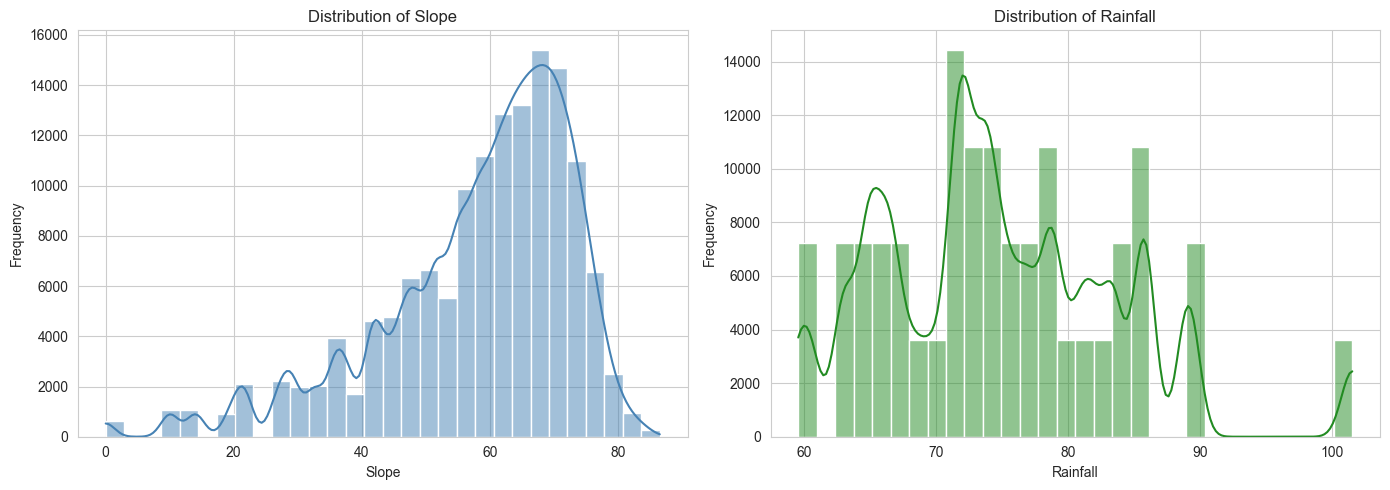

In [7]:
sns.set_style("whitegrid")

# Buat canvas dengan 2 kolom (Kiri & Kanan)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- PLOT 1: SLOPE (KIRI - BIRU) ---
sns.histplot(
    data=flood_clean,
    x='Slope',
    kde=True,            # Tampilkan garis kurva
    color='steelblue',   # Warna biru mirip contoh
    edgecolor='white',   # Garis pemisah antar batang
    bins=30,             # Jumlah batang (bisa diatur)
    ax=axes[0]           # Taruh di kotak kiri
)
axes[0].set_title("Distribution of Slope")
axes[0].set_ylabel("Frequency")
axes[0].set_xlabel("Slope")

# --- PLOT 2: RAINFALL (KANAN - HIJAU) ---
sns.histplot(
    data=flood_gpd,
    x='Rainfall',
    kde=True,            # Tampilkan garis kurva
    color='forestgreen', # Warna hijau mirip contoh
    edgecolor='white',
    bins=30,
    ax=axes[1]           # Taruh di kotak kanan
)
axes[1].set_title("Distribution of Rainfall")
axes[1].set_ylabel("Frequency")
axes[1].set_xlabel("Rainfall")

plt.tight_layout()
plt.show()

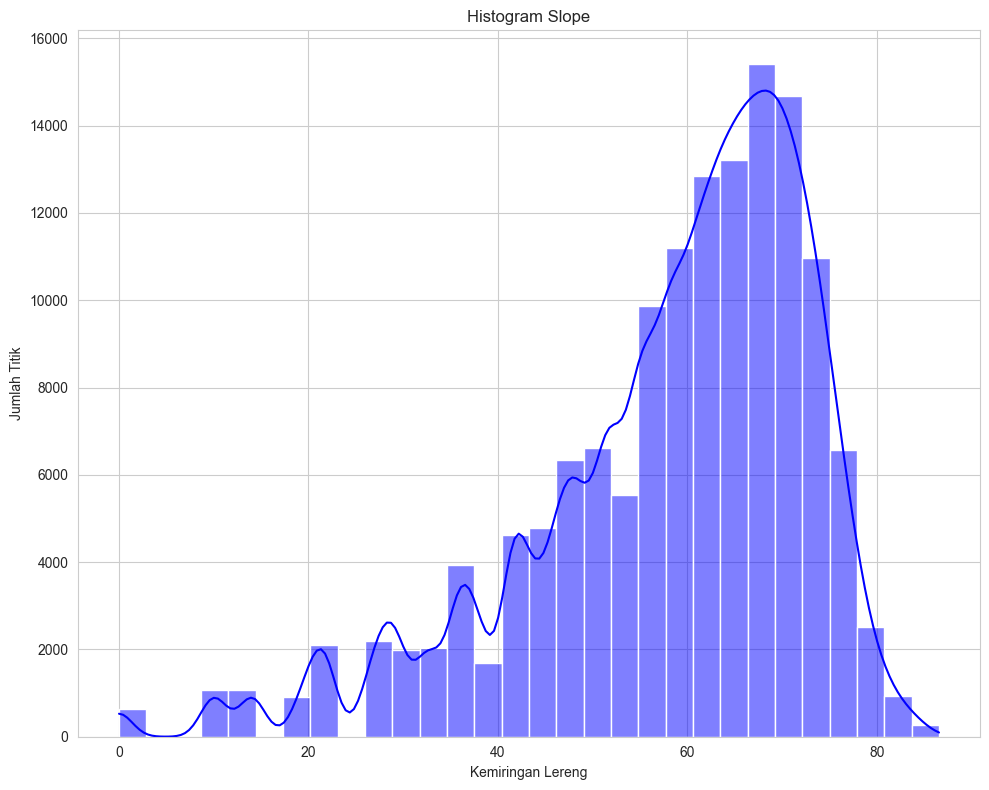

In [8]:
# Buat histogram untuk parameter Slope dan Rainfall.
# Apa yang bisa kamu simpulkan dari distribusi data tersebut?

plt.figure(figsize=(10,8))
sns.histplot(flood_clean['Slope'], bins=30, color='blue',kde=True)
plt.title('Histogram Slope')
plt.xlabel('Kemiringan Lereng')
plt.ylabel('Jumlah Titik')
plt.tight_layout()
plt.show()

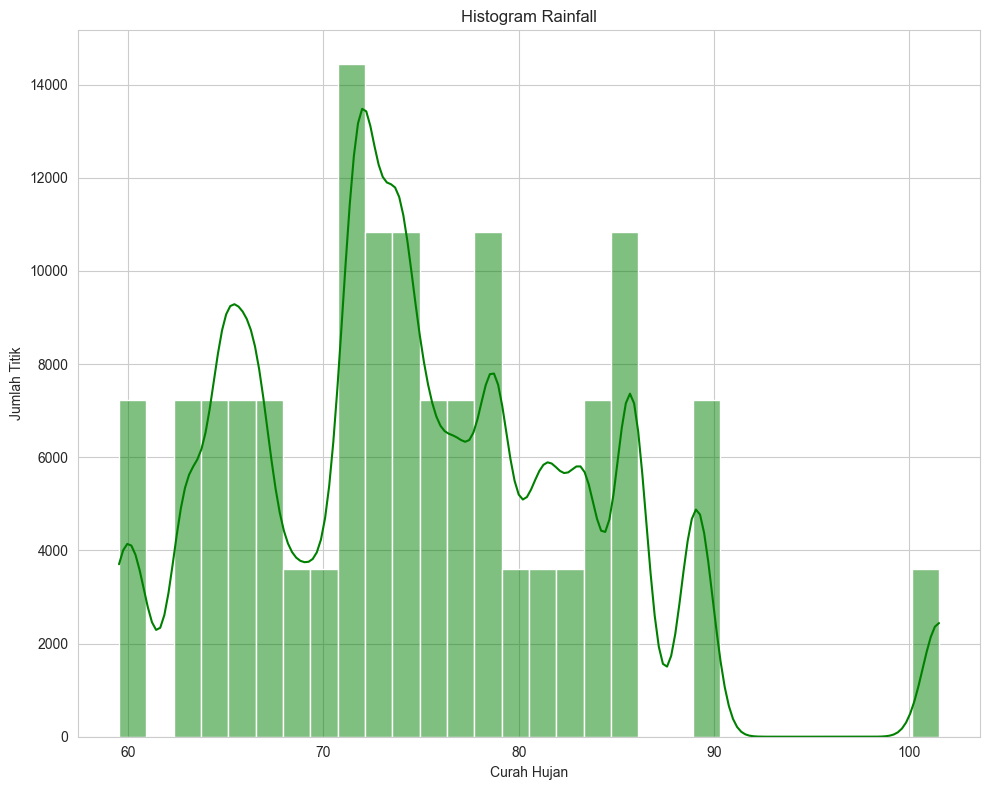

In [59]:
plt.figure(figsize=(10,8))
sns.histplot(flood_gpd['Rainfall'], bins=30, color='green',kde=True)
plt.title('Histogram Rainfall')
plt.xlabel('Curah Hujan')
plt.ylabel('Jumlah Titik')
plt.tight_layout()
plt.show()

SUSCEP
Moderate     38116
High         34451
Low          32252
Very_High    23456
No_Flood     16126
Name: count, dtype: int64


C:\Users\shafa_31kwx3b\AppData\Local\Temp\ipykernel_3952\1335356950.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SUSCEP', data=flood_gpd, palette='viridis')


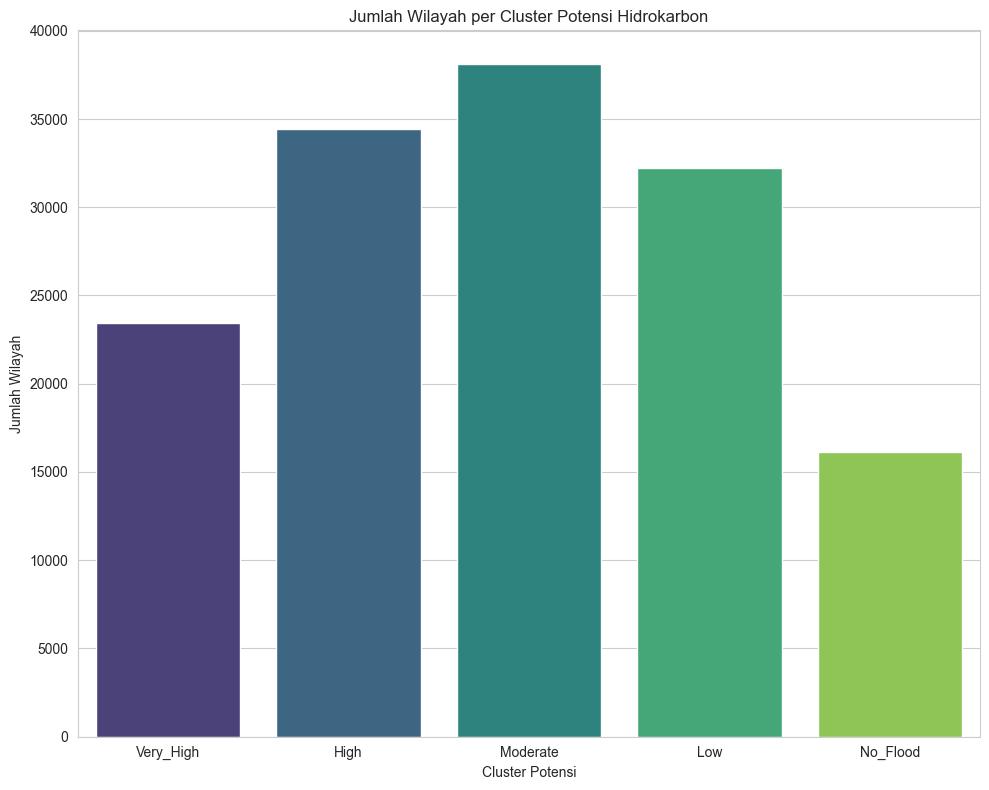

In [9]:
# Hitung jumlah titik per kategori susceptibility.
# Visualisasikan hasilnya dengan bar chart.

cluster_counts = flood_gpd['SUSCEP'].value_counts()
print(cluster_counts)


plt.figure(figsize=(10,8))
sns.countplot(x='SUSCEP', data=flood_gpd, palette='viridis')
plt.title('Jumlah Wilayah per Cluster Potensi Hidrokarbon')
plt.xlabel('Cluster Potensi')
plt.ylabel('Jumlah Wilayah')
plt.tight_layout()
plt.show()

C:\Users\shafa_31kwx3b\AppData\Local\Temp\ipykernel_3952\508940264.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


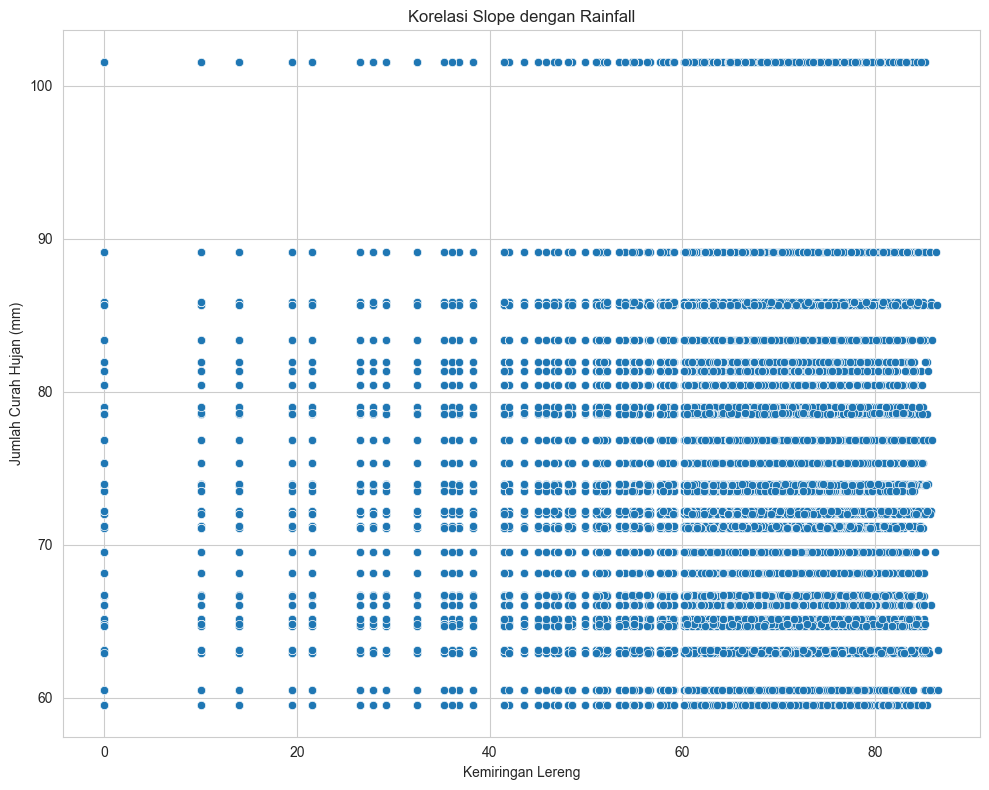

In [10]:
# Buat scatter plot antara Slope dan Rainfall.
# Apakah ada pola tertentu yang terlihat?

plt.figure(figsize=(10,8))
sns.scatterplot(
    x='Slope',
    y='Rainfall',
    data = flood_clean,
    palette='tab20'
)
plt.title("Korelasi Slope dengan Rainfall")
plt.xlabel('Kemiringan Lereng')
plt.ylabel('Jumlah Curah Hujan (mm)')
plt.tight_layout()
plt.show()

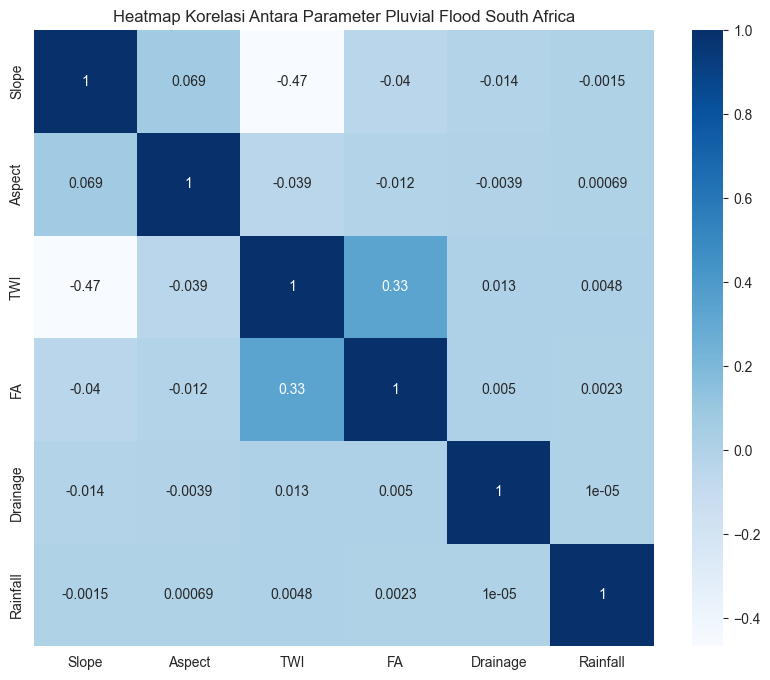

In [12]:
# Hitung matriks korelasi antar parameter numerik.
# Visualisasikan dengan heatmap.

corr_matrixs = flood_clean[['Slope','Aspect', 'TWI', 'FA', 'Drainage', 'Rainfall']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrixs, annot=True, cmap='Blues')
plt.title('Heatmap Korelasi Antara Parameter Pluvial Flood South Africa')
plt.show()

In [19]:
# Pilih dan filter data flood yang ingin divisualisasikan (misal: 5 titik acak dari seluruh dataset).
# Buat peta interaktif yang hanya menampilkan titik-titik hasil filter.
# Tambahkan popup/tooltip pada setiap marker yang menampilkan nilai susceptibility dan parameter penting (misal: Slope, Rainfall, TWI).
# Simpan peta sebagai file HTML dan pastikan bisa dibuka di browser.

df_center = flood_clean.copy()

# Pastikan CRS sesuai (WGS84) agar lat/long akurat
if df_center.crs != "EPSG:4326":
    df_center = df_center.to_crs("EPSG:4326")

df_center['centroid'] = df_center.geometry.centroid
df_center['longitude'] = df_center['centroid'].x
df_center['latitude'] = df_center['centroid'].y

# 2. Atur Kategori 'SUSCEP' agar bisa diurutkan
urutan_data = ['No_Flood', 'Low', 'Moderate', 'High', 'Very_High']
df_center['SUSCEP'] = pd.Categorical(
    df_center['SUSCEP'],
    categories=urutan_data,
    ordered=True
)

# 3. Filter Data: Ambil 5 lokasi dengan risiko tertinggi & curah hujan tertinggi
top5_suscep = df_center.sort_values(
    by=['SUSCEP', 'Rainfall'],
    ascending=[False, False]
).head(5)

# Center peta dari rata-rata centroid
center = [top5_suscep['latitude'].mean(), top5_suscep['longitude'].mean()]
m = folium.Map(location=center, zoom_start=15, tiles='OpenStreetMap')

for idx, row in top5_suscep.iterrows():
    
    # A. Tambahkan Polygon Wilayah (Opsional: agar bentuk aslinya terlihat)
    folium.GeoJson(
        row['geometry'],
        style_function=lambda feature: {
            'fillColor': 'red', # Merah untuk risiko tinggi
            'color': 'black',
            'weight': 2,
            'fillOpacity': 0.6,
        },
        tooltip=f"Wilayah: {idx}" # Tooltip sederhana saat hover polygon
    ).add_to(m)

    # B. Tambahkan Marker & Popup Informasi Lengkap
    # Membuat konten HTML untuk popup agar rapi
    popup_content = f"""
    <div style="width: 200px;">
        <h4>Detail Banjir</h4>
        <b>Tingkat Risiko:</b> {row['SUSCEP']}<br>
        <b>Curah Hujan:</b> {row['Rainfall']} mm<br>
        <b>Kemiringan (Slope):</b> {row['Slope']}<br>
        <b>TWI:</b> {row['TWI']}
    </div>
    """
    
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_content, max_width=250),
        tooltip=f"Klik untuk info: {row['SUSCEP']}", # Tooltip saat hover marker
        icon=folium.Icon(color='red', icon='info-sign', prefix='glyphicon')
    ).add_to(m)

# 6. Simpan Peta
output_file = 'webgis_top5_flood_risk.html'
m.save(output_file)
print(f"Peta interaktif berhasil disimpan sebagai '{output_file}'.")

Peta interaktif berhasil disimpan sebagai 'webgis_top5_flood_risk.html'.


C:\Users\shafa_31kwx3b\AppData\Local\Temp\ipykernel_3952\1653103052.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_center['centroid'] = df_center.geometry.centroid
